Input Graph:


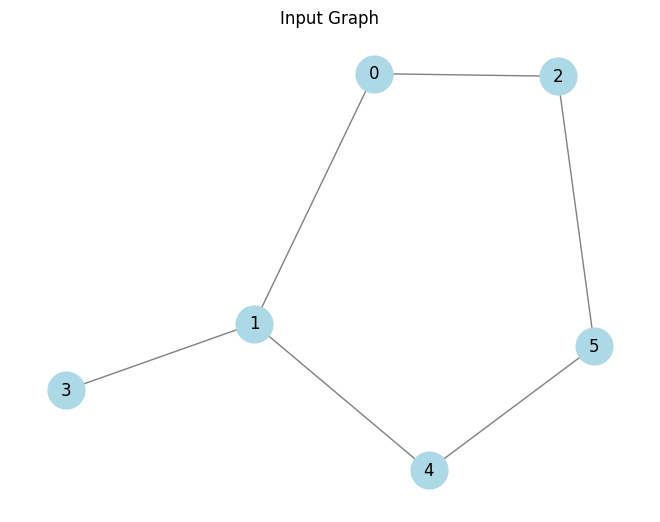


Recursive DFS Traversal Order:
[0, 1, 3, 4, 5, 2]


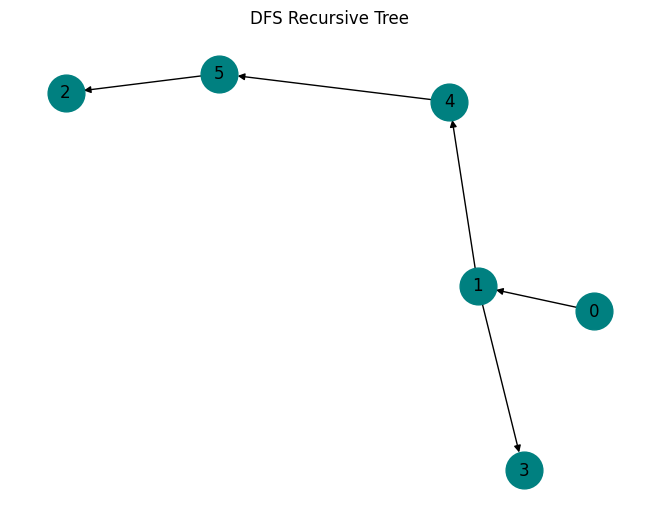

In [1]:
# 1. Implement Recursive Depth First Search Algorithm. Read the undirected
# unweighted graph from a .csv file. 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

class GraphVisualization:
    def __init__(self):
        self.visual = []
        self.graph = {}

    def addEdge(self, a, b):
        a, b = int(a), int(b)  # Cast to plain int
        self.visual.append([a, b])
        if a not in self.graph:
            self.graph[a] = []
        if b not in self.graph:
            self.graph[b] = []
        self.graph[a].append(b)
        self.graph[b].append(a)

    def visualize(self, title):
        grp = nx.Graph()
        grp.add_edges_from(self.visual)
        pos = nx.spring_layout(grp)
        plt.figure()
        nx.draw(grp, pos, with_labels=True, node_color="lightblue", node_size=700, edge_color="gray")
        plt.title(title)
        plt.show()

    def dfs_recursive(self, start, visited=None, parent=None, tree=None, order=None):
        if visited is None:
            visited = set()
            tree = nx.DiGraph()
            order = []
        visited.add(start)
        order.append(start)
        if parent is not None:
            tree.add_edge(parent, start)
        for neighbor in self.graph[start]:
            if neighbor not in visited:
                self.dfs_recursive(neighbor, visited, start, tree, order)
        return tree, order

    def visualize_tree(self, tree, title):
        pos = nx.spring_layout(tree)
        plt.figure()
        nx.draw(tree, pos, with_labels=True, node_color="teal", node_size=700, edge_color="black", arrows=True)
        plt.title(title)
        plt.show()


# Create graph instance
G = GraphVisualization()

# Read edges from CSV and convert to int
edges_df = pd.read_csv("D:/College/AIL/edges_small.csv", header=None)
for _, row in edges_df.iterrows():
    G.addEdge(row[0], row[1])

# Visualize the graph
print("Input Graph:")
G.visualize("Input Graph")

# Perform Recursive DFS
print("\nRecursive DFS Traversal Order:")
tree_recursive, order_recursive = G.dfs_recursive(0)
print([int(x) for x in order_recursive])  # Ensures clean output
G.visualize_tree(tree_recursive, "DFS Recursive Tree")

# edges.csv 0,1 | 0,2 | 1,3 | 1,4 | 2,5 | 2,6 | 3,7 | 3,8 | 4,9 | 5,6 | 6,7 | 7,8 | 8,9 | 0,5 | 1,6 | 2,9 | 3,5 | 4,8 | 0,7 | 1,8 | 6,9 | 5,9 | 0,6 | 3,9 | 2,4
# edges_small.csv 0,1 | 0,2 | 1,3 | 1,4 | 2,5 | 4,5 

In [15]:
%pip install networkx matplotlib pandas

Note: you may need to restart the kernel to use updated packages.
